In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)


In [2]:
data_path_frontend = Path('/home/strrl/ssd/score_frontend')
data_path_devops = Path('/home/strrl/ssd/score_devops')
data_path_game = Path('/home/strrl/ssd/score_game')
data_path_ml = Path('/home/strrl/ssd/score_ml')
data_path_mobile = Path('/home/strrl/ssd/score_mobile')

years = [2019, 2020, 2021, 2022, 2023, 2024]
frontend_files = {
    year: data_path_frontend / f'{year}_toxicr_score.parquet' for year in years
}
devops_files = {
    year: data_path_devops / f'{year}_toxicr_score.parquet' for year in years
}
game_files = {
    year: data_path_game / f'{year}_toxicr_score.parquet' for year in years
}
ml_files = {
    year: data_path_ml / f'{year}_toxicr_score.parquet' for year in years
}
mobile_files = {
    year: data_path_mobile / f'{year}_toxicr_score.parquet' for year in years
}

# load all year data
frontend_dfs = {}
for year, file_path in frontend_files.items():
    if file_path.exists():
        df = pd.read_parquet(file_path)
        df['year'] = year
        frontend_dfs[year] = df

devops_dfs = {}
for year, file_path in devops_files.items():
    if file_path.exists():
        df = pd.read_parquet(file_path)
        df['year'] = year
        devops_dfs[year] = df

game_dfs = {}
for year, file_path in game_files.items():
    if file_path.exists():
        df = pd.read_parquet(file_path)
        df['year'] = year
        game_dfs[year] = df

ml_dfs = {}
for year, file_path in ml_files.items():
    if file_path.exists():
        df = pd.read_parquet(file_path)
        df['year'] = year
        ml_dfs[year] = df

mobile_dfs = {}
for year, file_path in mobile_files.items():
    if file_path.exists():
        df = pd.read_parquet(file_path)
        df['year'] = year
        mobile_dfs[year] = df


# concat all data
frontend_data = pd.concat(frontend_dfs.values(), ignore_index=True)
devops_data = pd.concat(devops_dfs.values(), ignore_index=True)
game_data = pd.concat(game_dfs.values(), ignore_index=True)
ml_data = pd.concat(ml_dfs.values(), ignore_index=True)
mobile_data = pd.concat(mobile_dfs.values(), ignore_index=True)

print(f"frontend total data: {len(frontend_data):,} records")
print(f"devops total data: {len(devops_data):,} records")
print(f"game total data: {len(game_data):,} records")
print(f"ml total data: {len(ml_data):,} records")
print(f"mobile total data: {len(mobile_data):,} records")



frontend total data: 402,791 records
devops total data: 117,660 records
game total data: 86,678 records
ml total data: 126,507 records
mobile total data: 139,254 records



frontend toxic analysis (score > 0.5):
 year  total  toxic  toxic_ratio(%)  non_toxic_ratio(%)
 2019  67884   1069            1.57               98.43
 2020  76816   1157            1.51               98.49
 2021  51338    730            1.42               98.58
 2022  63056    999            1.58               98.42
 2023  69654   1038            1.49               98.51
 2024  74043    869            1.17               98.83

devops toxic analysis (score > 0.5):
 year  total  toxic  toxic_ratio(%)  non_toxic_ratio(%)
 2019  12517    119            0.95               99.05
 2020  16172    119            0.74               99.26
 2021  18192    169            0.93               99.07
 2022  13188     87            0.66               99.34
 2023  18836    145            0.77               99.23
 2024  38755    348            0.90               99.10

game toxic analysis (score > 0.5):
 year  total  toxic  toxic_ratio(%)  non_toxic_ratio(%)
 2019   6086    131            2.15           

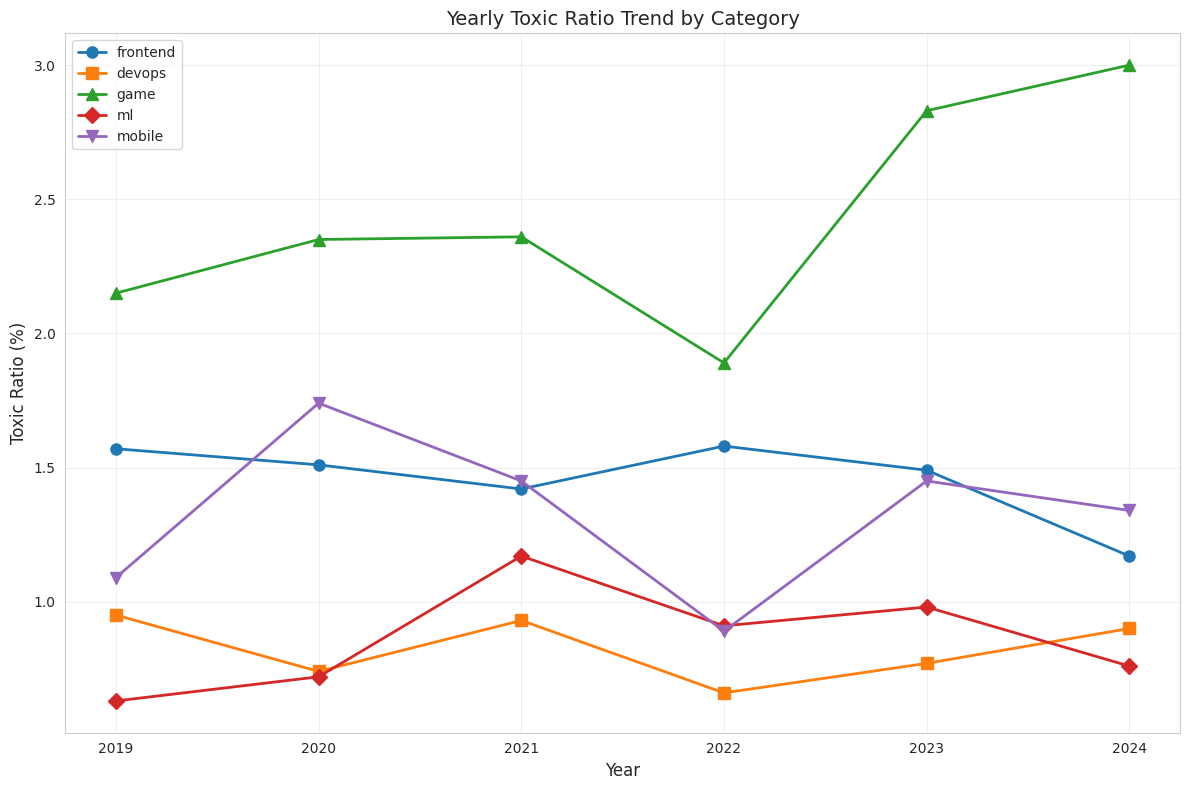

In [5]:
# toxic analysis (score > 0.5)
toxic_threshold = 0.5
score_col = 'score'

# function to calculate toxic stats
def calculate_toxic_stats(dfs_dict, category_name):
    toxic_stats = []
    for year in sorted(dfs_dict.keys()):
        df = dfs_dict[year]
        total_count = len(df)
        toxic_count = len(df[df[score_col] > toxic_threshold])
        toxic_ratio = toxic_count / total_count * 100
        
        toxic_stats.append({
            'year': year,
            'category': category_name,
            'total': total_count,
            'toxic': toxic_count,
            'toxic_ratio(%)': round(toxic_ratio, 2),
            'non_toxic': total_count - toxic_count,
            'non_toxic_ratio(%)': round(100 - toxic_ratio, 2)
        })
    return toxic_stats

# calculate stats for all categories
all_toxic_stats = []
categories = {
    'frontend': frontend_dfs,
    'devops': devops_dfs,
    'game': game_dfs,
    'ml': ml_dfs,
    'mobile': mobile_dfs
}

for category, dfs in categories.items():
    stats = calculate_toxic_stats(dfs, category)
    all_toxic_stats.extend(stats)

# create combined dataframe
toxic_df_all = pd.DataFrame(all_toxic_stats)

# print stats for each category
for category in categories.keys():
    category_df = toxic_df_all[toxic_df_all['category'] == category]
    print(f"\n{category} toxic analysis (score > 0.5):")
    print(category_df[['year', 'total', 'toxic', 'toxic_ratio(%)', 'non_toxic_ratio(%)']].to_string(index=False))

# visualize all categories in one plot
plt.figure(figsize=(12, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
markers = ['o', 's', '^', 'D', 'v']

for i, category in enumerate(categories.keys()):
    category_data = toxic_df_all[toxic_df_all['category'] == category]
    plt.plot(category_data['year'], category_data['toxic_ratio(%)'], 
             marker=markers[i], linewidth=2, markersize=8, 
             label=category, color=colors[i])

plt.title('Yearly Toxic Ratio Trend by Category', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Toxic Ratio (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(years)
plt.tight_layout()
plt.show()